In [1]:
# from google.colab import drive
# drive.mount('/content/drive')


In [2]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_fscore_support, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
csv_path = 'creditcard.csv'

In [4]:
df = pd.read_csv(csv_path)

In [5]:
df.shape

(284807, 31)

In [6]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


###EDA

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [8]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [9]:
fraud = df[df['Class'] == 1]
non_fraud = df[df['Class'] == 0]

print('Fraud Cases: {}'.format(len(df[df['Class'] == 1])))
print('Fraud Cases: {}'.format(round(df['Class'].value_counts()[1]/len(df) * 100,2)), '% of the dataset')

print('------------------------------------------------------------------')

print('Non Fraud Transactions: {}'.format(len(df[df['Class'] == 0])))
print('Non Fraud Transactions: {}'.format(round(df['Class'].value_counts()[0]/len(df) * 100,2)), '% of the dataset')

Fraud Cases: 492
Fraud Cases: 0.17 % of the dataset
------------------------------------------------------------------
Non Fraud Transactions: 284315
Non Fraud Transactions: 99.83 % of the dataset


In [10]:
pd.concat([fraud.Amount.describe(), non_fraud.Amount.describe()], axis=1)

,Amount,Amount
count,492.000000,284315.000000
mean,122.211321,88.291022
std,256.683288,250.105092
min,0.000000,0.000000
25%,1.000000,5.650000
50%,9.250000,22.000000
75%,105.890000,77.050000
max,2125.870000,25691.160000


In [11]:
pd.concat([fraud.Time.describe(), non_fraud.Time.describe()], axis=1)

,Time,Time
count,492.000000,284315.000000
mean,80746.806911,94838.202258
std,47835.365138,47484.015786
min,406.000000,0.000000
25%,41241.500000,54230.000000
50%,75568.500000,84711.000000
75%,128483.000000,139333.000000
max,170348.000000,172792.000000


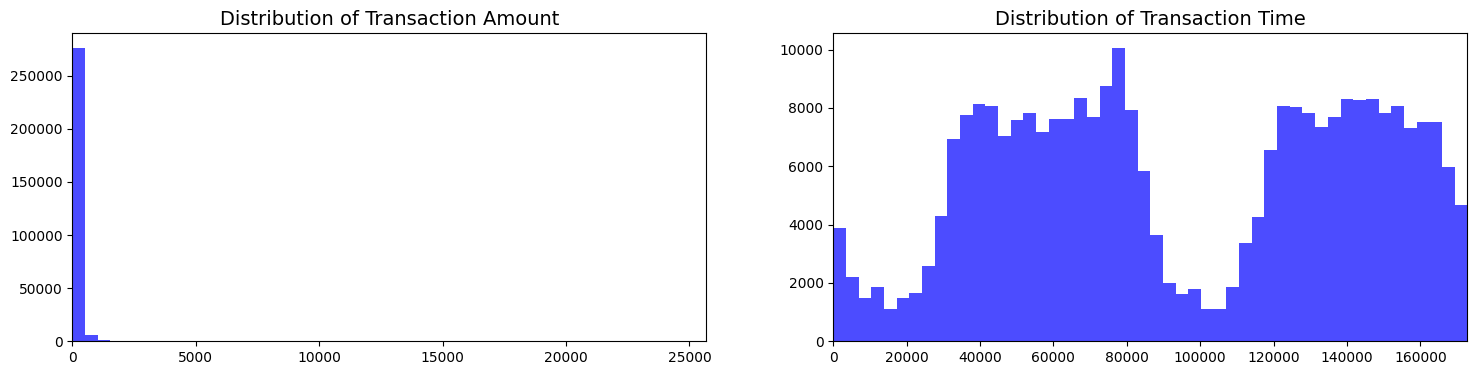

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(18, 4))

amount_val = df['Amount'].values
time_val = df['Time'].values

ax[0].hist(amount_val, bins=50, color='b', alpha=0.7)
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

ax[1].hist(time_val, bins=50, color='b', alpha=0.7)
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()

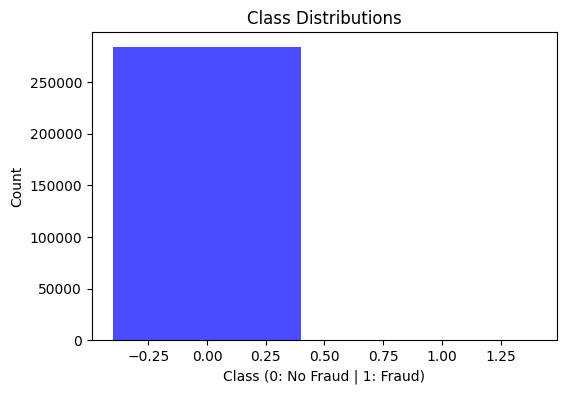

In [13]:
plt.figure(figsize=(6, 4))
plt.bar(df['Class'].value_counts().index, df['Class'].value_counts(), color=['b', 'r'], alpha=0.7)

# Set labels and title
plt.xlabel('Class (0: No Fraud | 1: Fraud)', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Class Distributions', fontsize=12)

# Show the plot
plt.show()

##Handle Data

In [14]:
# Data preprocessing
sc = StandardScaler()
df['normalizedAmount'] = sc.fit_transform(df['Amount'].values.reshape(-1, 1))
df = df.drop(['Amount', 'Time'], axis=1)
X = df.iloc[:, df.columns != 'Class']
y = df.iloc[:, df.columns == 'Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


In [15]:
# K-Means Clustering
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X_train)
X_train['Cluster'] = y_kmeans

In [16]:
accuracy_cluster = accuracy_score(y_train, y_kmeans)
print("Accuracy for Clustering:", accuracy_cluster)

Accuracy for Clustering: 0.4737957822203691


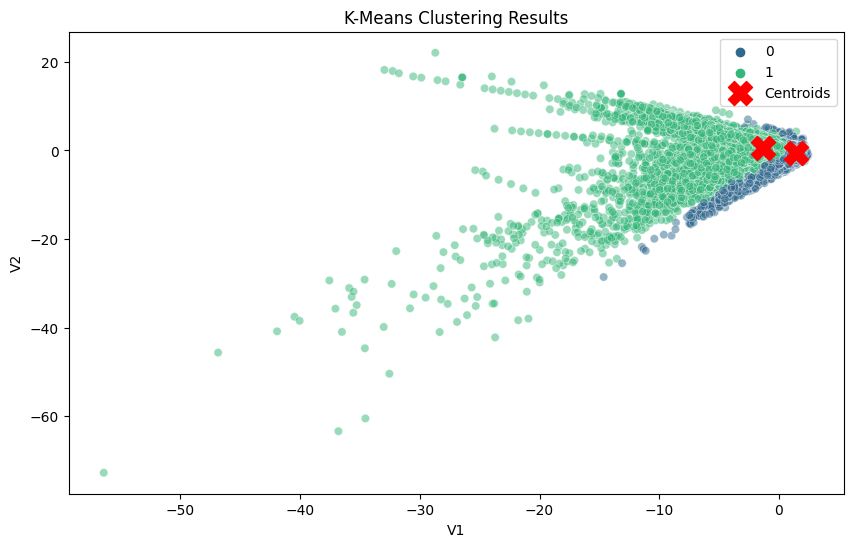

In [17]:
# Plot K-Means Clustering Results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='V1', y='V2', hue='Cluster', data=X_train, palette='viridis', legend='full', alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.title('K-Means Clustering Results')
plt.xlabel('V1')
plt.ylabel('V2')
plt.legend()
plt.show()

In [18]:
# Logistic Regression Classification
lr_classifier = LogisticRegression(random_state=42)
lr_classifier.fit(X_train.drop('Cluster', axis=1), y_train.values.ravel())
y_pred_lr = lr_classifier.predict(X_test)

In [19]:
# Random Forest Classification
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train.drop('Cluster', axis=1), y_train.values.ravel())
y_pred_rf = rf_classifier.predict(X_test)

In [20]:
# Support Vector Machine (SVM) Classification
svm_classifier = SVC(random_state=42)
svm_classifier.fit(X_train.drop('Cluster', axis=1), y_train.values.ravel())
y_pred_svm = svm_classifier.predict(X_test)

In [21]:
def plot_confusion_matrix(cm, classes, title, cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = range(len(classes))
    plt.xticks(tick_marks, classes, rotation=0)
    plt.yticks(tick_marks, classes)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')

In [22]:
# Classification Evaluation - Logistic Regression
classification_metrics_lr = precision_recall_fscore_support(y_test, y_pred_lr, average='binary')
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Classification Metrics (Precision, Recall, F1-Score):", classification_metrics_lr)
print("Logistic Regression Accuracy:", accuracy_lr)

Logistic Regression Classification Metrics (Precision, Recall, F1-Score): (0.8636363636363636, 0.5816326530612245, 0.6951219512195121, None)
Logistic Regression Accuracy: 0.9991222218320986


In [23]:
# Classification Evaluation - Random Forest
classification_metrics_rf = precision_recall_fscore_support(y_test, y_pred_rf, average='binary')
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Classification Metrics (Precision, Recall, F1-Score):", classification_metrics_rf)
print("Random Forest Accuracy:", accuracy_rf)

Random Forest Classification Metrics (Precision, Recall, F1-Score): (0.974025974025974, 0.7653061224489796, 0.8571428571428571, None)
Random Forest Accuracy: 0.9995611109160493


In [24]:
# Classification Evaluation - Support Vector Machine (SVM)
classification_metrics_svm = precision_recall_fscore_support(y_test, y_pred_svm, average='binary')
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("SVM Classification Metrics (Precision, Recall, F1-Score):", classification_metrics_svm)
print("SVM Accuracy:", accuracy_svm)

SVM Classification Metrics (Precision, Recall, F1-Score): (0.9682539682539683, 0.6224489795918368, 0.7577639751552796, None)
SVM Accuracy: 0.9993153330290369
